        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Group Project - Fall 2020</h1>

### Submitted By: Group 1(Blue)
            Kajal Jain : 1001815317 <br>
            Tanvi J. Bapna : 1001719315 <br>
            Rohith Ramesh : 1001518031 <br>

You need to work as a team for this project. Your job is to develop a predictive model that can predict whether or not a movie is a <i>Comedy</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Comedy.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Comedy or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) ComedyGenre. The value for the thirrd column should be in a binary format. If the movie is comedy the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Comedy movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be captured by students. 

<b>Extra Credit</b> The group with the best prediction model is going to get extra points.

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np

### <b>Step 1:</b> Explore all files to become familiar with the dataset 
#### a. Getting familier with the dataset movies.csv 

In [2]:
# exploring the dataset movie.csv
movie_data = pd.read_csv("movies.csv")
movie_data.head()

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller


In [3]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23498 entries, 0 to 23497
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  23498 non-null  int64 
 1   title    23498 non-null  object
 2   genres   23498 non-null  object
dtypes: int64(1), object(2)
memory usage: 550.9+ KB


#### b.Getting familier with the dataset movies_story_student.csv:

In [4]:
# exploring movie story student file.
movie_student_data=pd.read_csv("movie_story_student_file.csv")
movie_student_data.head()

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...


In [5]:
# renaming column movie_id
movie_student_data.rename(columns = {'movie_id':'movieId'}, inplace = True)   

In [6]:
# getting familier with dataset
movie_student_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  20000 non-null  int64 
 1   story    20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


### Step : Data preprocessing and cleaning

In [7]:
import re                                                
# function for text cleaning : cleaning the test and removing unwanted character from story 
def clean_text(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()
    
    return text

In [8]:
# creating new column Story(cleaned text) in movie_student_data
movie_student_data['Story'] = movie_student_data['story'].apply(lambda x: clean_text(x))
movie_student_data.head()

,movieId,story,Story
0,131072,A girl who always tends to fall in love with t...,a girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ...",bigfoot has come to the town of ellwood city p...
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",at an altitude of feet alaska s mount st elias...
3,196611,"In her first special since 2003, Ellen revisit...",in her first special since ellen revisits her ...
4,196613,Mike and Sulley are back at Monsters Universit...,mike and sulley are back at monsters universit...


In [9]:
# change datatype of 'movie_id' movieId	
movie_data['movieId'] = movie_data['movieId'].astype(str)
movie_student_data['movieId'] = movie_student_data['movieId'].astype(str)

# merge meta with movies
movie_student_data = pd.merge(movie_student_data, movie_data[['movieId', 'title', 'genres']],on = ['movieId'], how='right')

In [10]:
movie_student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23498 entries, 0 to 23497
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  23498 non-null  object
 1   story    20000 non-null  object
 2   Story    20000 non-null  object
 3   title    23498 non-null  object
 4   genres   23498 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [11]:
#creating column for comedy genre

flag=movie_student_data['genres'].str.contains("Comedy")
movie_student_data['Com_gen']=flag
movie_student_data.head()

,movieId,story,Story,title,genres,Com_gen
0,131072,A girl who always tends to fall in love with t...,a girl who always tends to fall in love with t...,Jesus liebt mich (2012),Comedy,True
1,196609,"Bigfoot has come to the town of Ellwood City, ...",bigfoot has come to the town of ellwood city p...,Bigfoot The Movie (2015),Comedy|Horror,True
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",at an altitude of feet alaska s mount st elias...,Mount St. Elias (2009),Documentary,False
3,196611,"In her first special since 2003, Ellen revisit...",in her first special since ellen revisits her ...,Ellen DeGeneres: Relatable (2018),Comedy,True
4,196613,Mike and Sulley are back at Monsters Universit...,mike and sulley are back at monsters universit...,Party Central (2014),Animation|Children|Comedy|Fantasy,True


In [12]:
#converting into categorical data
movie_student_data.loc[movie_student_data['Com_gen']==True,'Com_gen']=1
movie_student_data.loc[movie_student_data['Com_gen']==False,'Com_gen']=0
movie_student_data.head()

,movieId,story,Story,title,genres,Com_gen
0,131072,A girl who always tends to fall in love with t...,a girl who always tends to fall in love with t...,Jesus liebt mich (2012),Comedy,1
1,196609,"Bigfoot has come to the town of Ellwood City, ...",bigfoot has come to the town of ellwood city p...,Bigfoot The Movie (2015),Comedy|Horror,1
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",at an altitude of feet alaska s mount st elias...,Mount St. Elias (2009),Documentary,0
3,196611,"In her first special since 2003, Ellen revisit...",in her first special since ellen revisits her ...,Ellen DeGeneres: Relatable (2018),Comedy,1
4,196613,Mike and Sulley are back at Monsters Universit...,mike and sulley are back at monsters universit...,Party Central (2014),Animation|Children|Comedy|Fantasy,1


### <b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Comedy or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) ComedyGenre. The value for the thirrd column should be in a binary format. If the movie is comedy the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />

In [13]:
#step2: Creating main dataset with 3 columns movieId, Story and com_gen.

main_dataset = movie_student_data[['movieId','Story','Com_gen']].copy()
main_dataset.head()

,movieId,Story,Com_gen
0,131072,a girl who always tends to fall in love with t...,1
1,196609,bigfoot has come to the town of ellwood city p...,1
2,131074,at an altitude of feet alaska s mount st elias...,0
3,196611,in her first special since ellen revisits her ...,1
4,196613,mike and sulley are back at monsters universit...,1


In [14]:
main_dataset.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23498 entries, 0 to 23497
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  23498 non-null  object
 1   Story    20000 non-null  object
 2   Com_gen  23498 non-null  object
dtypes: object(3)
memory usage: 734.3+ KB


### <b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  
#### For training our models we are using 70% of our data and rest is used for testing.

In [15]:
# Splitting the dataset:
from sklearn.model_selection import train_test_split
train, test = train_test_split(main_dataset, test_size=0.3)
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Train shape: (16448, 3)
Test shape: (7050, 3)


In [16]:
#Forming Wordcloud

from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from sklearn.feature_extraction.text import CountVectorizer 
#Lets start with first 2 story
reviews = main_dataset.Story[0:2]
reviews

0    a girl who always tends to fall in love with t...
1    bigfoot has come to the town of ellwood city p...
Name: Story, dtype: object

In [18]:
vect = CountVectorizer()
vect.fit(reviews)
bag_of_words = vect.transform(reviews)
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names())

,all,alongside,always,america,among,an,anchor,and,are,as,...,wdve,who,with,wootton,world,wpxi,wrong,wysocki,xe,yinzer
0,0,0,1,0,0,1,0,0,0,0,...,0,2,1,0,1,0,1,0,0,0
1,1,1,0,1,1,0,1,6,1,1,...,2,0,0,1,0,1,0,1,5,1


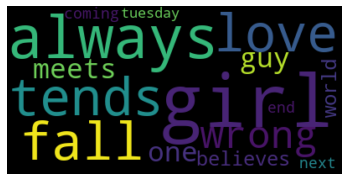

In [19]:
wordcloud = WordCloud().generate(reviews[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

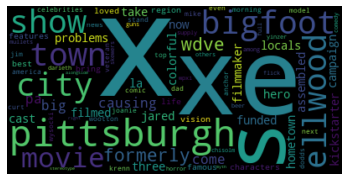

In [20]:
wordcloud = WordCloud().generate(reviews[1])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

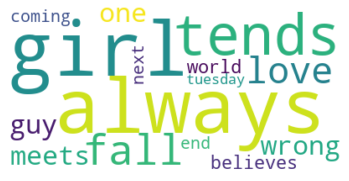

In [21]:
wordcloud = WordCloud(max_font_size=90, max_words=100, 
                      background_color="white")
wordcloud.generate(reviews[0])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

### <b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. 
### For this step we are using different Text analysis and predictive models.
#### Text Analysis methods: 
<ul>
    <ol>Count Vectorization</ol>
    <ol>TF-IDF</ol>
    <ol>Lemmatization</ol>
    <ol>LDA</ol> 
</ul>

#### Predictive Models:
<ul>
    <ol>Logistic Regression</ol>
    <ol>Random Forest</ol>
    <ol>Multinomial Naive Bayes</ol>
    <ol>Stochastic Gradient Descent</ol> 
    <ol>Support Vector MAchine</ol>
</ul>



In [22]:
text, y = train.Story, train.Com_gen
print("type of text_train: {}".format(type(text)))
print("length of text_train: {}".format(len(text)))
print("text[0]: {}".format(text[1]))


type of text_train: <class 'pandas.core.series.Series'>
length of text_train: 16448
text[0]: bigfoot has come to the town of ellwood city pa and is causing big problems now it xe x x s up to three town locals to take him down funded by a kickstarter campaign and filmed in ellwood city la filmmaker and hometown hero jared show assembled a colorful cast of characters from all over the region to bring his vision to life the movie features some of pittsburgh xe x x s most famous and best loved celebrities like curt wootton pittsburgh dad joanie dodds america xe x x s next top model jim krenn stand up comic formerly of the wdve morning show mike wysocki wdve and even veteran news anchor darieth chisolm formerly of wpxi among others in this comedy horror flick mullets guns and beer are in full supply as the movie skewers the pittsburgh xe x x yinzer xe x x stereotype right alongside the bigfoot myth


In [23]:
set(y)

{0, 1}

In [24]:
np.bincount(y)

array([12174,  4274])

### Method 1, Count Vectorizer

In [25]:
# removing stop words
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(ngram_range=(1,3),stop_words="english")
x1 = vect.fit_transform(text.apply(lambda x1: np.str_(x1)))

In [26]:
# Creating empty lists to store the predicted values of given respective scores
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

In [27]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y=y.astype('int')
model_LR = LogisticRegression(max_iter=300)
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=0)

model_LR.fit(x_train, y_train)
y1_test_hat = model_LR.predict(x_test)
accuracy_list.append(round(accuracy_score(y_test,y1_test_hat) * 100,2))

In [28]:
from sklearn import metrics

precision_list.append(metrics.precision_score(y_test, y1_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y1_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y1_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y1_test_hat))         

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      3684
           1       0.68      0.27      0.39      1251

    accuracy                           0.78      4935
   macro avg       0.74      0.61      0.63      4935
weighted avg       0.77      0.78      0.75      4935



In [29]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=200, random_state=0)
model_RFC.fit(x_train,y_train)                                          #fitting the model
y2_test_hat = model_RFC.predict(x_test)
accuracy_list.append(round(accuracy_score(y_test,y2_test_hat) * 100,2))

In [30]:
precision_list.append(metrics.precision_score(y_test, y2_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y2_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y2_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y2_test_hat))         

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3684
           1       0.90      0.06      0.12      1251

    accuracy                           0.76      4935
   macro avg       0.83      0.53      0.49      4935
weighted avg       0.79      0.76      0.67      4935



In [31]:
# Model 3: MNB along with accuracy, confusion matrix and classification report
from sklearn.naive_bayes import MultinomialNB
model_MNB = MultinomialNB()
model_MNB.fit(x_train, y_train)
y3_test_hat = model_MNB.predict(x_test)
accuracy_list.append(round(accuracy_score(y_test,y3_test_hat) * 100,2))

In [32]:
precision_list.append(metrics.precision_score(y_test, y3_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y3_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y3_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y3_test_hat))         

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3684
           1       0.51      0.51      0.51      1251

    accuracy                           0.75      4935
   macro avg       0.67      0.67      0.67      4935
weighted avg       0.75      0.75      0.75      4935



In [33]:
# Model 4: Stochastic Gradient Descent 
from sklearn.linear_model import SGDClassifier
model_SGD = SGDClassifier()
model_SGD.fit(x_train, y_train)
y4_test_hat = model_SGD.predict(x_test)
accuracy_list.append(round(accuracy_score(y_test,y4_test_hat) * 100,2))

In [34]:
precision_list.append(metrics.precision_score(y_test, y4_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y4_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y4_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y4_test_hat))         

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      3684
           1       0.65      0.27      0.38      1251

    accuracy                           0.78      4935
   macro avg       0.72      0.61      0.62      4935
weighted avg       0.76      0.78      0.74      4935



In [35]:
# Model 5: Support Vector Machine
from sklearn.svm import SVC
SVM = SVC(C=1, kernel='linear', gamma="auto")
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=0)
SVM.fit(x_train, y_train)
y5_test_hat = SVM.predict(x_test)
accuracy_list.append(round(accuracy_score(y_test,y5_test_hat) * 100,2))

In [36]:
precision_list.append(metrics.precision_score(y_test, y5_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y5_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y5_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y5_test_hat))         

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3684
           1       0.63      0.31      0.42      1251

    accuracy                           0.78      4935
   macro avg       0.71      0.62      0.64      4935
weighted avg       0.76      0.78      0.75      4935



In [37]:
print(" Accuracy Score for different models : ")
print("\tLogistic Regression:",accuracy_list[0])
print("\tRandom Forest:",accuracy_list[1])
print("\tMultinomialNB:",accuracy_list[2])
print("\tStochastic Gradient Descent:",accuracy_list[3])
print("\tSVM:",accuracy_list[4])

 Accuracy Score for different models : 
	Logistic Regression: 78.3
	Random Forest: 76.11
	MultinomialNB: 75.02
	Stochastic Gradient Descent: 77.79
	SVM: 77.85


## Results:
Using the above CountVectorization method for Text Analysis, the best model is Logistic Regression, with accuracy score of 78.3.
#### Presenting bar graphs to properly visualize the accuracy, F-1, Precision, and Recall score for above used models.

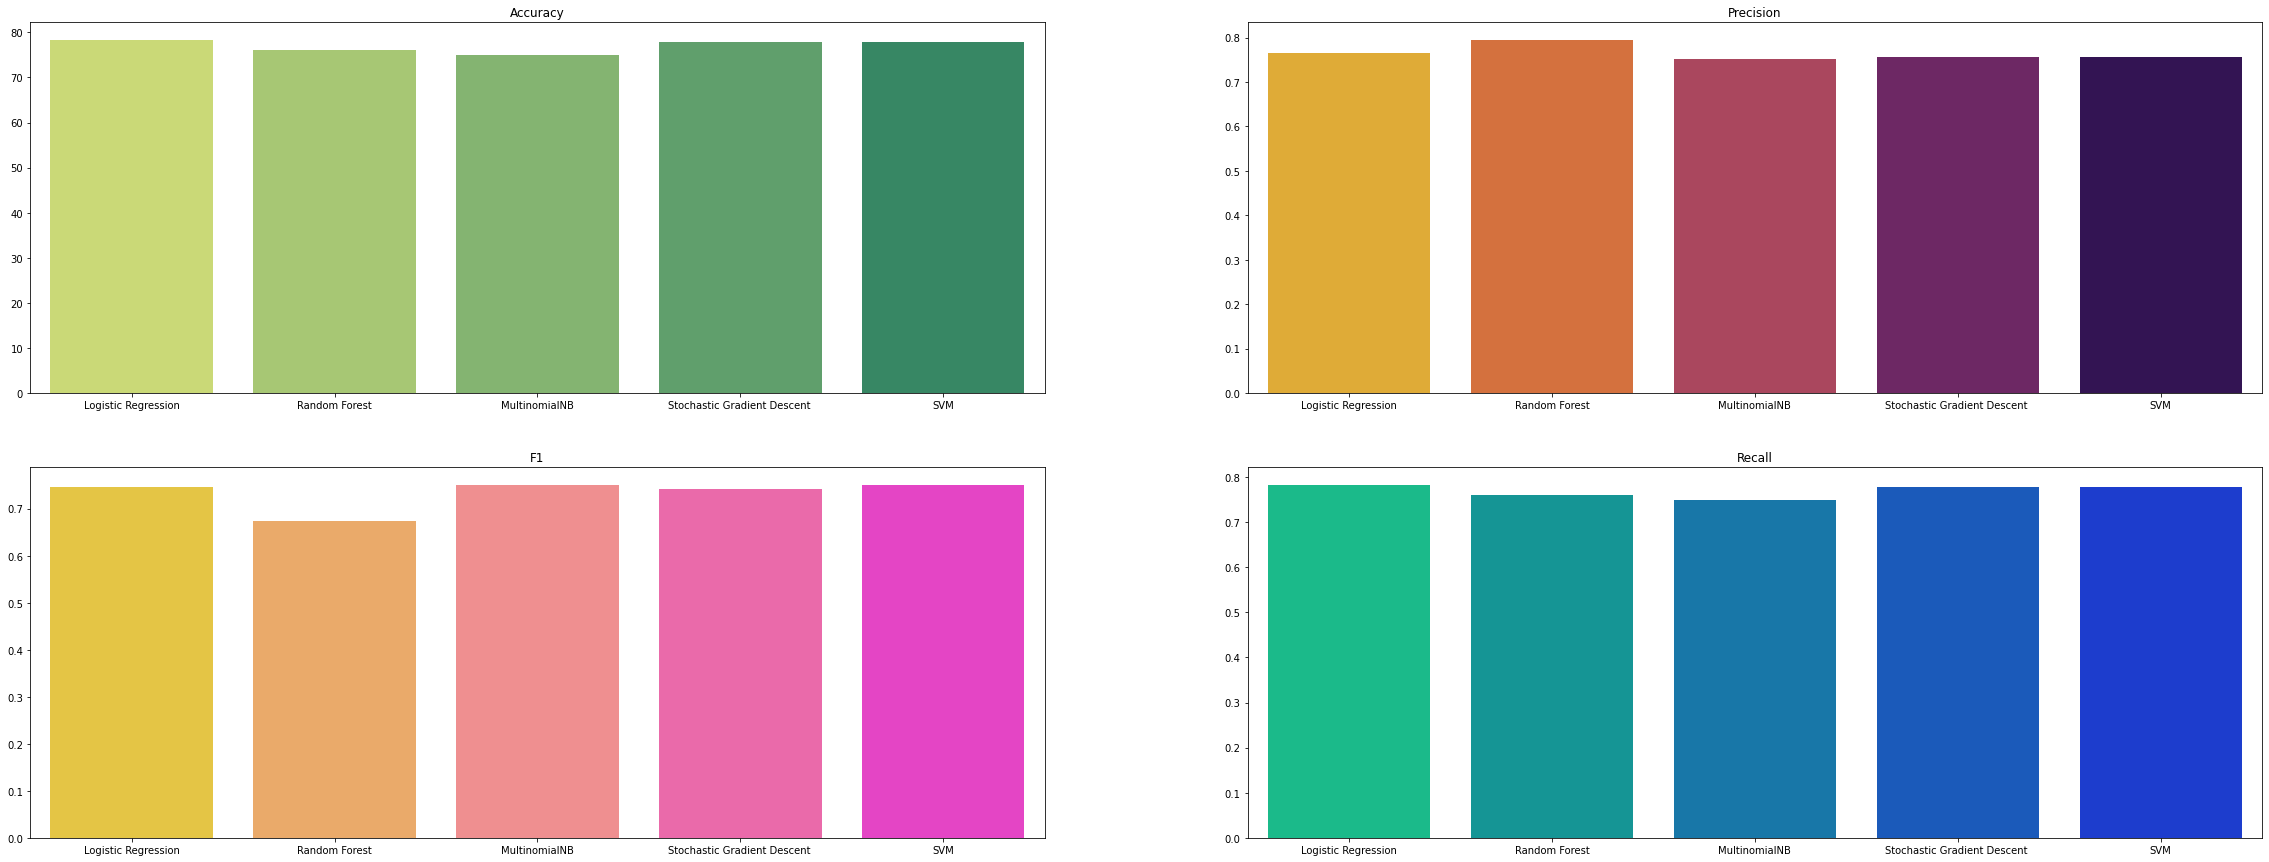

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns 

Models=['Logistic Regression','Random Forest','MultinomialNB','Stochastic Gradient Descent ','SVM']

# we plot the various scores from previous cell in a bar chart for comparison
f, axes = plt.subplots(2, 2,figsize=(40,15))
sns.barplot(x=Models,y=accuracy_list, ax=axes[0][0],palette='summer_r').set_title("Accuracy")
sns.barplot(x=Models,y=precision_list, ax=axes[0][1],palette='inferno_r').set_title("Precision")
sns.barplot(x=Models,y=f1_list, ax=axes[1][0],palette='spring_r').set_title("F1")
sns.barplot(x=Models,y=recall_list, ax=axes[1][1],palette='winter_r').set_title("Recall")

plt.show()

### Method 2, TF-IDF 

In [39]:
# Method 2
# Applying TFidf along with removing stop words
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,3),stop_words="english")
x = vect.fit_transform(text.apply(lambda x: np.str_(x)))

In [40]:
# Creating empty lists
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

In [41]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model_LR = LogisticRegression(max_iter=300)
model_LR.fit(x_train, y_train)
y1_test_hat = model_LR.predict(x_test)

In [42]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y1_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y1_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y1_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y1_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y1_test_hat))         

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3684
           1       0.73      0.01      0.02      1251

    accuracy                           0.75      4935
   macro avg       0.74      0.50      0.44      4935
weighted avg       0.74      0.75      0.64      4935



In [43]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=200, random_state=0)
model_RFC.fit(x_train,y_train)                                          
y2_test_hat = model_RFC.predict(x_test)

In [44]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y2_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y2_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y2_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y2_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y2_test_hat))         

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3684
           1       0.88      0.06      0.11      1251

    accuracy                           0.76      4935
   macro avg       0.82      0.53      0.48      4935
weighted avg       0.79      0.76      0.67      4935



In [45]:
# Model 3: Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model_MNB = MultinomialNB()
model_MNB.fit(x_train, y_train)
y3_test_hat = model_MNB.predict(x_test)

In [46]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y3_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y3_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y3_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y3_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y3_test_hat))         

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3684
           1       0.00      0.00      0.00      1251

    accuracy                           0.75      4935
   macro avg       0.37      0.50      0.43      4935
weighted avg       0.56      0.75      0.64      4935



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Model 4: Stochastic Gradient Descent 
from sklearn.linear_model import SGDClassifier
model_SGD = SGDClassifier()
model_SGD.fit(x_train, y_train)
y4_test_hat = model_SGD.predict(x_test)

In [48]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y4_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y4_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y4_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y4_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y4_test_hat))         

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3684
           1       0.87      0.09      0.17      1251

    accuracy                           0.77      4935
   macro avg       0.82      0.54      0.52      4935
weighted avg       0.79      0.77      0.69      4935



In [49]:
# Model 5: Support Vector Machine
from sklearn.svm import SVC
SVM = SVC(C=1, kernel='linear', gamma="auto")
SVM.fit(x_train, y_train)
y5_test_hat = SVM.predict(x_test)

In [50]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y5_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y5_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y5_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y5_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y5_test_hat))        

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      3684
           1       0.82      0.12      0.21      1251

    accuracy                           0.77      4935
   macro avg       0.79      0.56      0.54      4935
weighted avg       0.78      0.77      0.70      4935



In [51]:
print(" Accuracy Score for different models : ")
print("\tLogistic Regression:",accuracy_list[0])
print("\tRandom Forest:",accuracy_list[1])
print("\tMultinomialNB:",accuracy_list[2])
print("\tStochastic Gradient Descent:",accuracy_list[3])
print("\tSVM:",accuracy_list[4])

 Accuracy Score for different models : 
	Logistic Regression: 74.79
	Random Forest: 75.91
	MultinomialNB: 74.65
	Stochastic Gradient Descent: 76.64
	SVM: 77.04


## Results:
Using the above TF-IDF method for Text Analysis, the best model is SVM, with accuracy score of 77.04.
#### Presenting bar graphs to properly visualize the accuracy, F-1, Precision, and Recall score for above used models.

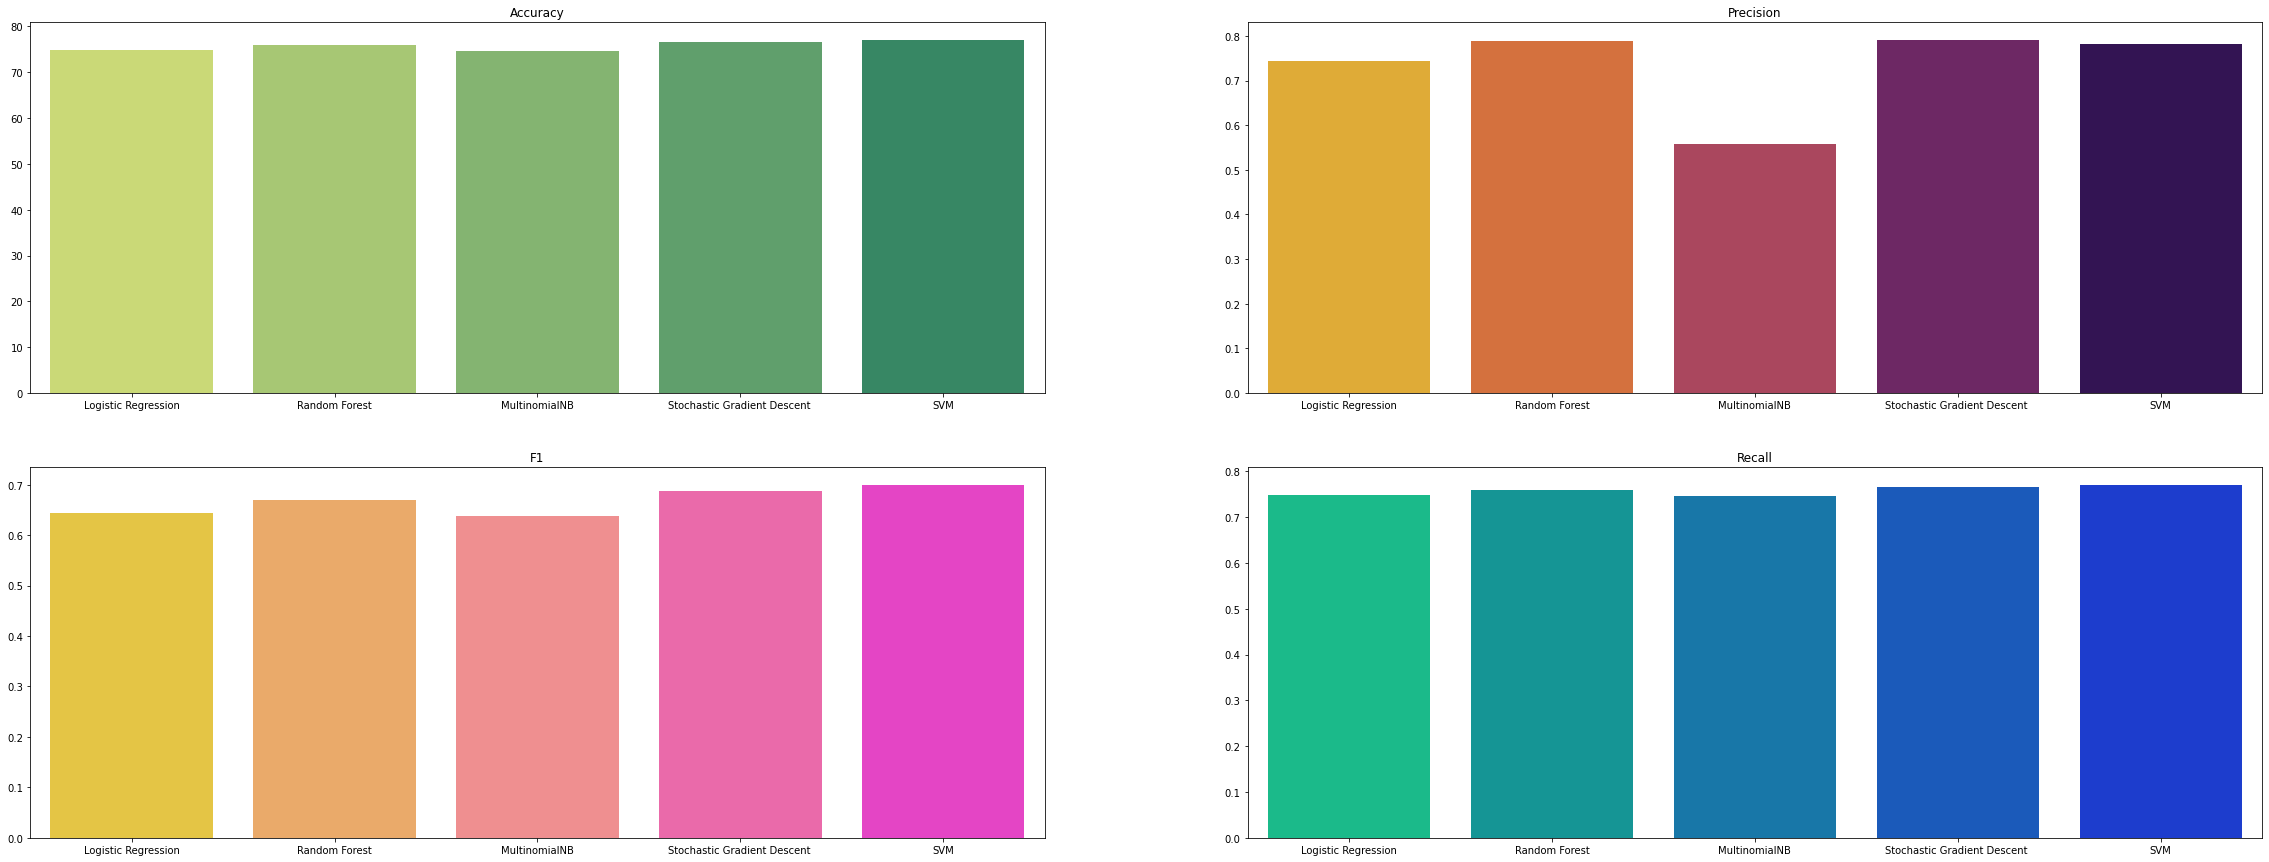

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns 
Models=['Logistic Regression','Random Forest','MultinomialNB','Stochastic Gradient Descent ','SVM']

# we plot the various scores from previous cell in a bar chart for comparison
f, axes = plt.subplots(2, 2,figsize=(40,15))
sns.barplot(x=Models,y=accuracy_list, ax=axes[0][0],palette='summer_r').set_title("Accuracy")
sns.barplot(x=Models,y=precision_list, ax=axes[0][1],palette='inferno_r').set_title("Precision")
sns.barplot(x=Models,y=f1_list, ax=axes[1][0],palette='spring_r').set_title("F1")
sns.barplot(x=Models,y=recall_list, ax=axes[1][1],palette='winter_r').set_title("Recall")

plt.show()

In [53]:
# import sys
# !conda install --yes --prefix "{sys.prefix}" nltk

In [54]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/T/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/T/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Method 03, Lemmatization


In [55]:
# import sys
# !conda install --yes --prefix "{sys.prefix}" spacy 

In [56]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/opt/anaconda3/lib/python3.8/site-packages/en_core_web_sm -->
/opt/anaconda3/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [57]:
# Method 3
from html import unescape
import spacy

spacy.load('en')
lemmatizer = spacy.lang.en.English()

# defining new tokenizer
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

# remove html entities from docs and set everything to lowercase
def my_preprocessor(doc):
    return(unescape(doc).lower())

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
custom_vec = TfidfVectorizer(tokenizer=my_tokenizer, 
                             preprocessor=my_preprocessor, 
                             ngram_range=(1,3),stop_words="english")
x = custom_vec.fit_transform(text.apply(lambda x: np.str_(x)))

In [59]:
# Creating empty lists
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

In [60]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model_LR = LogisticRegression(max_iter=300)
model_LR.fit(x_train, y_train)
y1_test_hat = model_LR.predict(x_test)
# print("Accuracy with lemmatization for Logistic Regression is:",round(accuracy_score(y_test,y1_test_hat) * 100,2))

In [61]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y1_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y1_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y1_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y1_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y1_test_hat))        

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3684
           1       0.73      0.01      0.02      1251

    accuracy                           0.75      4935
   macro avg       0.74      0.50      0.44      4935
weighted avg       0.74      0.75      0.64      4935



In [62]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=200, random_state=0)
model_RFC.fit(x_train,y_train)                                          
y2_test_hat = model_RFC.predict(x_test)

In [63]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y2_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y2_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y2_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y2_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y2_test_hat))         

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3684
           1       0.87      0.06      0.11      1251

    accuracy                           0.76      4935
   macro avg       0.82      0.53      0.49      4935
weighted avg       0.79      0.76      0.67      4935



In [64]:
# Model 3:  Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model_MNB = MultinomialNB()
model_MNB.fit(x_train, y_train)
y3_test_hat = model_MNB.predict(x_test)

In [65]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y3_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y3_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y3_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y3_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y3_test_hat))         

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3684
           1       0.00      0.00      0.00      1251

    accuracy                           0.75      4935
   macro avg       0.37      0.50      0.43      4935
weighted avg       0.56      0.75      0.64      4935



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# Model 4: Stochastic Gradient Descent 
from sklearn.linear_model import SGDClassifier
model_SGD = SGDClassifier()
model_SGD.fit(x_train, y_train)
y4_test_hat = model_SGD.predict(x_test)

In [67]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y4_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y4_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y4_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y4_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y4_test_hat))         

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3684
           1       0.88      0.09      0.16      1251

    accuracy                           0.77      4935
   macro avg       0.82      0.54      0.51      4935
weighted avg       0.79      0.77      0.69      4935



In [68]:
# Model 5: Support Vector Machine
from sklearn.svm import SVC
SVM = SVC(C=1, kernel='linear', gamma="auto")
SVM.fit(x_train, y_train)
y5_test_hat = SVM.predict(x_test)

In [69]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y5_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y5_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y5_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y5_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y5_test_hat))         

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      3684
           1       0.83      0.12      0.21      1251

    accuracy                           0.77      4935
   macro avg       0.80      0.56      0.54      4935
weighted avg       0.79      0.77      0.70      4935



In [70]:
print(" Accuracy Score for different models : ")
print("\tLogistic Regression:",accuracy_list[0])
print("\tRandom Forest:",accuracy_list[1])
print("\tMultinomialNB:",accuracy_list[2])
print("\tStochastic Gradient Descent:",accuracy_list[3])
print("\tSVM:",accuracy_list[4])

 Accuracy Score for different models : 
	Logistic Regression: 74.79
	Random Forest: 75.97
	MultinomialNB: 74.65
	Stochastic Gradient Descent: 76.56
	SVM: 77.14


## Results:
Using the above Lemmentatization method for Text Analysis, the best model is SVM, with accuracy score of 77.14
#### Presenting bar graphs to properly visualize the accuracy, F-1, Precision, and Recall score for above used models.

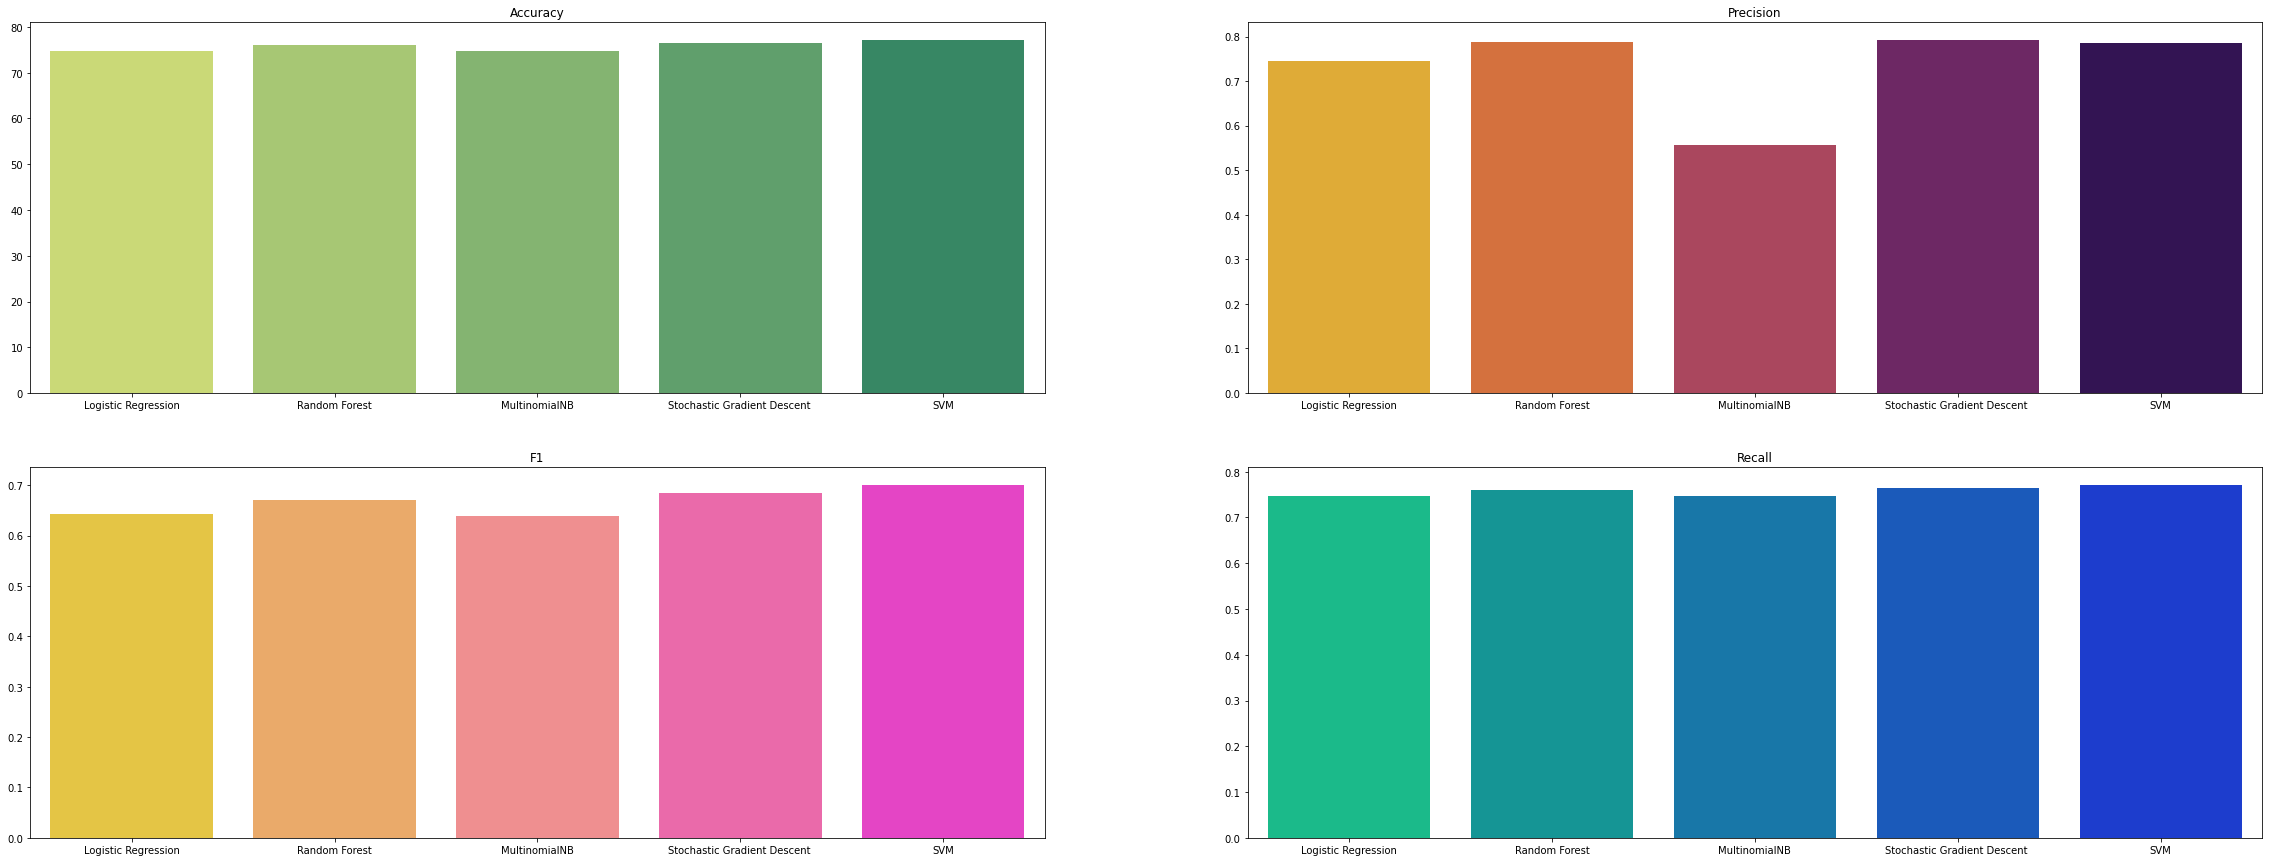

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns 
Models=['Logistic Regression','Random Forest','MultinomialNB','Stochastic Gradient Descent ','SVM']

# we plot the various scores from previous cell in a bar chart for comparison
f, axes = plt.subplots(2, 2,figsize=(40,15))
sns.barplot(x=Models,y=accuracy_list, ax=axes[0][0],palette='summer_r').set_title("Accuracy")
sns.barplot(x=Models,y=precision_list, ax=axes[0][1],palette='inferno_r').set_title("Precision")
sns.barplot(x=Models,y=f1_list, ax=axes[1][0],palette='spring_r').set_title("F1")
sns.barplot(x=Models,y=recall_list, ax=axes[1][1],palette='winter_r').set_title("Recall")

plt.show()

### Method 04, LDA

In [72]:
# Let's create the Document Term Frequency Matrix
vect = CountVectorizer(max_features=10000, max_df=.60, 
                       stop_words="english")
x = vect.fit_transform(text.apply(lambda x: np.str_(x)))

In [73]:
# Method 4
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=25, learning_method="batch",
                                max_iter=25, random_state=0) 
x = lda.fit_transform(x)

In [74]:
# Creating empty lists
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

In [75]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LogisticRegression(max_iter=300)
model.fit(x_train, y_train)
y1_test_hat = model.predict(x_test)

In [76]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y1_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y1_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y1_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y1_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y1_test_hat))         #presenting classification report

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      3684
           1       0.43      0.04      0.08      1251

    accuracy                           0.74      4935
   macro avg       0.59      0.51      0.46      4935
weighted avg       0.67      0.74      0.65      4935



In [77]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=200, random_state=0)
model_RFC.fit(x_train,y_train)                                         
y2_test_hat = model_RFC.predict(x_test)

In [78]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y2_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y2_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y2_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y2_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y2_test_hat))         

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      3684
           1       0.37      0.11      0.16      1251

    accuracy                           0.73      4935
   macro avg       0.56      0.52      0.50      4935
weighted avg       0.66      0.73      0.67      4935



In [79]:
# Model 3: Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
y3_test_hat = model.predict(x_test)

In [80]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y3_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y3_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y3_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y3_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y3_test_hat))         

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3684
           1       0.00      0.00      0.00      1251

    accuracy                           0.75      4935
   macro avg       0.37      0.50      0.43      4935
weighted avg       0.56      0.75      0.64      4935



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
# Model 4: Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(x_train, y_train)
y4_test_hat = model.predict(x_test)

In [82]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y4_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y4_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y4_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y4_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y4_test_hat))         

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3684
           1       0.00      0.00      0.00      1251

    accuracy                           0.75      4935
   macro avg       0.37      0.50      0.43      4935
weighted avg       0.56      0.75      0.64      4935



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# Model 5: Support Vector Machine
from sklearn.svm import SVC
SVM = SVC(C=1, kernel='linear', gamma="auto")
SVM.fit(x_train, y_train)
y5_test_hat = SVM.predict(x_test)

In [84]:
accuracy_list.append(round(metrics.accuracy_score(y_test,y5_test_hat) * 100,2))
precision_list.append(metrics.precision_score(y_test, y5_test_hat, average= "weighted") )
f1_list.append(metrics.f1_score(y_test, y5_test_hat, average= "weighted") )
recall_list.append(metrics.recall_score(y_test, y5_test_hat, average= "weighted") )
print(metrics.classification_report(y_test, y5_test_hat))         

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3684
           1       0.00      0.00      0.00      1251

    accuracy                           0.75      4935
   macro avg       0.37      0.50      0.43      4935
weighted avg       0.56      0.75      0.64      4935



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print(" Accuracy Score for different models : ")
print("\tLogistic Regression:",accuracy_list[0])
print("\tRandom Forest:",accuracy_list[1])
print("\tMultinomialNB:",accuracy_list[2])
print("\tStochastic Gradient Descent:",accuracy_list[3])
print("\tSVM:",accuracy_list[4])

 Accuracy Score for different models : 
	Logistic Regression: 74.29
	Random Forest: 72.71
	MultinomialNB: 74.65
	Stochastic Gradient Descent: 74.65
	SVM: 74.65


## Results:
Using the above LDA method for Text Analysis, the best model is Logistic Regression, as even though Stochastic Gradient Descent and SVM, has more accuracy score i.e 74.65 as compare to Logistic Regression but, F1, recall and precision shows us that the models are biased towards target as 0 i.e they only evaluate or give correct prediction for target 0.
#### Presenting bar graphs to properly visualize the accuracy, F-1, Precision, and Recall score for above used models.

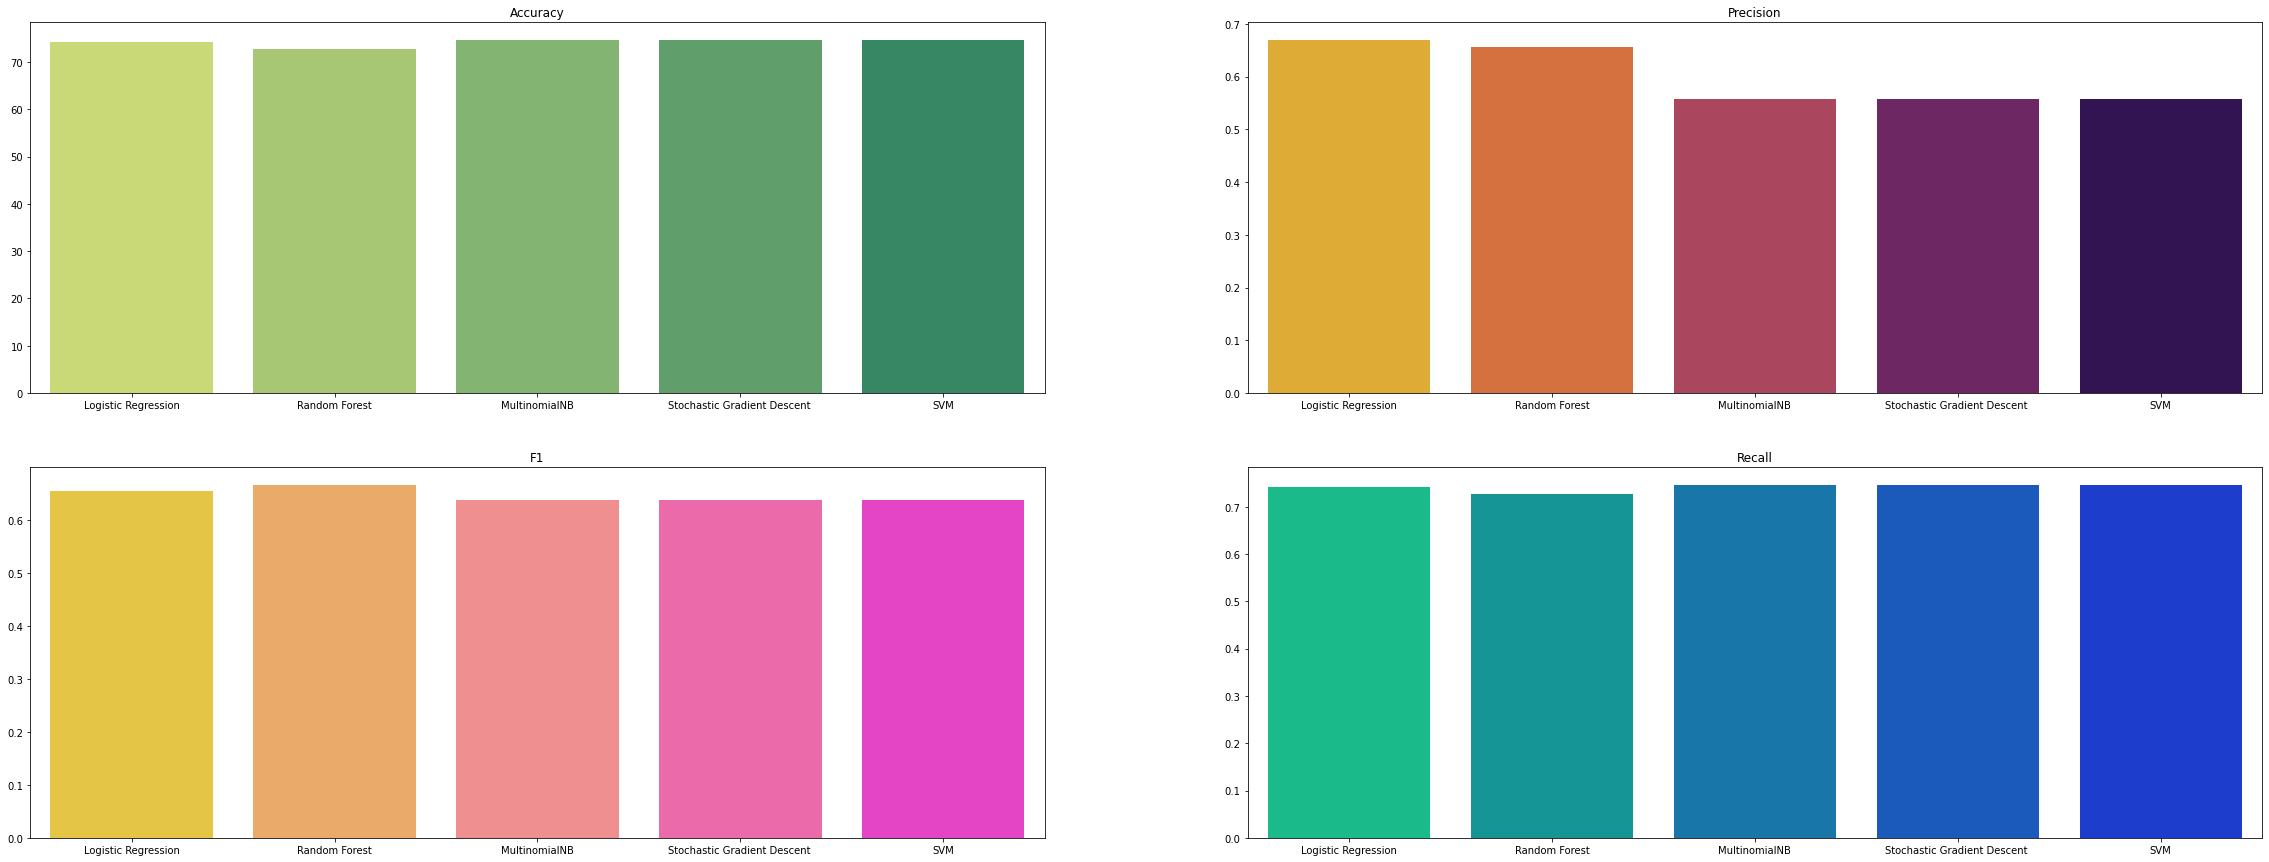

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns 
Models=['Logistic Regression','Random Forest','MultinomialNB','Stochastic Gradient Descent ','SVM']

# we plot the various scores from previous cell in a bar chart for comparison
f, axes = plt.subplots(2, 2,figsize=(40,15))
sns.barplot(x=Models,y=accuracy_list, ax=axes[0][0],palette='summer_r').set_title("Accuracy")
sns.barplot(x=Models,y=precision_list, ax=axes[0][1],palette='inferno_r').set_title("Precision")
sns.barplot(x=Models,y=f1_list, ax=axes[1][0],palette='spring_r').set_title("F1")
sns.barplot(x=Models,y=recall_list, ax=axes[1][1],palette='winter_r').set_title("Recall")

plt.show()

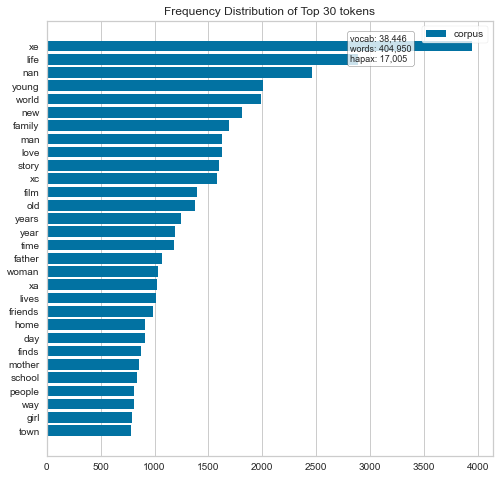

In [87]:
#just for visualization purpose:

from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Find the Document Term Frequency Matrix 
vect = CountVectorizer(stop_words='english')
x = vect.fit_transform(train.Story.apply(lambda x: np.str_(x)))

# Get all features (tokens)
features = vect.get_feature_names()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(x)
visualizer.poof()

### <b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.
After comparing different methods and models, for our project we got <strong>Logistic Regression</strong> as the best model with <strong>accuracy 78.3 </strong> when used along with CounterVEctorization. Considering the Recall and F-1 value for the given model, which is best for the above specified model: are 0.95, 0.87. Thus, we are using Logistic Regression for training the main_dataset and using for Prediction purposes to calculate accuracy of our final prediction on evaluation_dataset.


In [88]:
# Using main_dataset for training purpose:
x_train, y_train = main_dataset.Story, main_dataset.Com_gen
print("type of x_train: {}".format(type(x_train)))
print("length of tx_train: {}".format(len(x_train)))
print("x_train[0]:{}".format(x_train[0]))
print("y_train[0]:{}".format(y_train[0]))

type of x_train: <class 'pandas.core.series.Series'>
length of tx_train: 23498
x_train[0]:a girl who always tends to fall in love with the wrong guy meets one who believes the world is coming to an end next tuesday
y_train[0]:1


In [89]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(ngram_range=(1,3),stop_words="english")
x_train = vect.fit_transform(x_train.apply(lambda x1: np.str_(x1)))

In [90]:
x_train.shape

(23498, 1017740)

#### We are using Truncated SVD to reduce the number of features to 100.

In [91]:
# Reducing the number of columns 
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 100)    #using n_components as 100.
X_train = tsvd.fit_transform(x_train)
X_train.shape

(23498, 100)

In [92]:
# Fitting the model. Using main_dataset to train the model.
y_train = y_train.astype('int')
final_model = LogisticRegression(max_iter=300)
final_model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

### <b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. 

In [93]:
#adding a new column to the movie story evaluation dataset
evaluation_dataset = pd.read_csv("movie_story_evaluation_file.csv")
evaluation_dataset.rename(columns = {'movie_id':'movieId'}, inplace = True)   #renaming column movie_id
evaluation_dataset.head()

,movieId,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."


In [94]:
#creating new column Story(cleaned text)
evaluation_dataset['Story'] = evaluation_dataset['story'].apply(lambda x: clean_text(x))
evaluation_dataset.head()

,movieId,story,Story
0,122349,Growing up in the Mission district of San Fran...,growing up in the mission district of san fran...
1,122351,A soldier returns home from the Iraq war only ...,a soldier returns home from the iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...,marco the monkey works as a beach officer but ...
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",when an honest cop vijay kumar s family is rut...
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",kathiresan aka kaththi a criminal escapes from...


In [95]:
# change datatype of 'movie_id' movieId	
movie_data['movieId'] = movie_data['movieId'].astype(str)
evaluation_dataset['movieId'] = evaluation_dataset['movieId'].astype(str)

# merge meta with movies
evaluation_dataset = pd.merge(evaluation_dataset, movie_data[['movieId', 'title', 'genres']],on = ['movieId'], how='right')

In [96]:
evaluation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23498 entries, 0 to 23497
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  23498 non-null  object
 1   story    3498 non-null   object
 2   Story    3498 non-null   object
 3   title    23498 non-null  object
 4   genres   23498 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [97]:
#creating column for comedy genre

flag=evaluation_dataset['genres'].str.contains("Comedy")
evaluation_dataset['Com_gen']=flag
evaluation_dataset.head()

,movieId,story,Story,title,genres,Com_gen
0,122349,Growing up in the Mission district of San Fran...,growing up in the mission district of san fran...,La Mission (2009),Drama,False
1,122351,A soldier returns home from the Iraq war only ...,a soldier returns home from the iraq war only ...,Stir of Echoes: The Homecoming (2007),Horror|Thriller,False
2,122361,Marco the Monkey works as a beach officer. But...,marco the monkey works as a beach officer but ...,Primates of the Caribbean (2012),Animation|Children|Comedy,True
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",when an honest cop vijay kumar s family is rut...,Theri (2016),Action|Romance,False
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",kathiresan aka kaththi a criminal escapes from...,Kaththi (2014),Action|Drama|Romance,False


In [98]:
#converting into categorical data
evaluation_dataset.loc[evaluation_dataset['Com_gen']==True,'Com_gen']=1
evaluation_dataset.loc[evaluation_dataset['Com_gen']==False,'Com_gen']=0
evaluation_dataset.head()

,movieId,story,Story,title,genres,Com_gen
0,122349,Growing up in the Mission district of San Fran...,growing up in the mission district of san fran...,La Mission (2009),Drama,0
1,122351,A soldier returns home from the Iraq war only ...,a soldier returns home from the iraq war only ...,Stir of Echoes: The Homecoming (2007),Horror|Thriller,0
2,122361,Marco the Monkey works as a beach officer. But...,marco the monkey works as a beach officer but ...,Primates of the Caribbean (2012),Animation|Children|Comedy,1
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",when an honest cop vijay kumar s family is rut...,Theri (2016),Action|Romance,0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",kathiresan aka kaththi a criminal escapes from...,Kaththi (2014),Action|Drama|Romance,0


In [99]:
# Creating main dataset with 3 columns.
evaluation_dataset=evaluation_dataset[['movieId','Story','Com_gen']].copy()
evaluation_dataset.head()

,movieId,Story,Com_gen
0,122349,growing up in the mission district of san fran...,0
1,122351,a soldier returns home from the iraq war only ...,0
2,122361,marco the monkey works as a beach officer but ...,1
3,187901,when an honest cop vijay kumar s family is rut...,0
4,187903,kathiresan aka kaththi a criminal escapes from...,0


In [100]:
evaluation_dataset.info()                #dataset contains more than 20,000 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23498 entries, 0 to 23497
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  23498 non-null  object
 1   Story    3498 non-null   object
 2   Com_gen  23498 non-null  object
dtypes: object(3)
memory usage: 734.3+ KB


### <b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Comedy movies. 
#### Our selected model is Logistic Regression( After removing Stop words) , using the same for prediction purposes.

In [101]:
x_test, y_test = evaluation_dataset.Story, evaluation_dataset.Com_gen
print("type of x_test: {}".format(type(x_test)))
print("length of x_test: {}".format(len(x_test)))
print("x_test[0]: {}".format(x_test[1]))
print("y_test[0]: {}".format(y_test[0]))

type of x_test: <class 'pandas.core.series.Series'>
length of x_test: 23498
x_test[0]: a soldier returns home from the iraq war only to be haunted by visions of the dead
y_test[0]: 0


In [102]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(ngram_range=(1,3),stop_words="english")
x_test = vect.fit_transform(x_test.apply(lambda x1: np.str_(x1)))

In [103]:
x_test.shape

(23498, 192675)

In [104]:
X_test = tsvd.fit_transform(x_test)
X_test.shape

(23498, 100)

In [105]:
y_test = y_test.astype('int')
y1_test_hat = final_model.predict(X_test)

### <b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. 

In [106]:
print("Accuracy: ",round(accuracy_score(y_test,y1_test_hat) * 100,2))
print("Precision: " ,metrics.precision_score(y_test, y1_test_hat, average= "weighted"))
print("Recall : ",metrics.recall_score(y_test, y1_test_hat, average= "weighted"))
print("F1 score: ",metrics.f1_score(y_test, y1_test_hat, average= "weighted"))
print("Classification Report: ")
print(metrics.classification_report(y_test, y1_test_hat))         #presenting classification report

Accuracy:  72.0
Precision:  0.6219712962733646
Recall :  0.7200187249978721
F1 score:  0.6383909041222523
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.96      0.83     17357
           1       0.29      0.05      0.08      6141

    accuracy                           0.72     23498
   macro avg       0.51      0.50      0.46     23498
weighted avg       0.62      0.72      0.64     23498



## Results:
Final Accuracy of the model with evaluation_dataset using Logistic Regression is 72. The recall and f-1 score is 0.96 and 0.83 respectively.<br>
Presenting below the predictions and comparing them with original values for Com_Gen.

In [107]:
#predicted value using above model for evaluation_dataset
i=0
count=0
for i in range(23498):
    if y1_test_hat[i]==evaluation_dataset.Com_gen[i]:
        count=count+1
print("Out of specified range above, number of values for which original and predicted values are same:",count)
i=i+2

Out of specified range above, number of values for which original and predicted values are same: 16919


#### Comparison :
We can see that for the entire avaluation_dataset with 23498 values, our model is able to predict 16919 values correctly.
Our accuracy is justified for the above model as shown using above example, which is more than 71% of accuracy as calculated above.



### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final submited file should be very well structured and should have a consistent flow of analysis.</li>
    <li>You may want to use an additional word document to report the result of your analysis</li>
</ul>

#### Due Date: Nov 30 2020 at 11:59 PM

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">100%</b></td>
    </tr>
</table>